In [10]:
import pandas as pd

# Noktalı virgül (;) ayracı, ondalık virgül (,) ve Latin1 encoding ile dosyayı oku
df = pd.read_csv("data.csv", sep=";", encoding="latin1", decimal=",")

# İlk 5 satırı göster
df.head()


,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,...,36.6,100,2,Corneal abrasion,1,4,2,86,5.00,1
1,1,1,56,12,3,2,right forearm burn,1,1,2,...,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,3.95,1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,...,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,1.00,1
3,1,2,71,8,1,1,ascites tapping,1,1,3,...,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,9.83,1
4,1,2,58,4,3,1,"distension, abd",1,1,3,...,36.5,NaN,4,Ascites,1,5,8,109,6.60,1


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Group                     1267 non-null   int64  
 1   Sex                       1267 non-null   int64  
 2   Age                       1267 non-null   int64  
 3   Patients number per hour  1267 non-null   int64  
 4   Arrival mode              1267 non-null   int64  
 5   Injury                    1267 non-null   int64  
 6   Chief_complain            1267 non-null   object 
 7   Mental                    1267 non-null   int64  
 8   Pain                      1267 non-null   int64  
 9   NRS_pain                  1267 non-null   object 
 10  SBP                       1267 non-null   object 
 11  DBP                       1267 non-null   object 
 12  HR                        1267 non-null   object 
 13  RR                        1267 non-null   object 
 14  BT      

In [14]:
# 1. Eksik değer sayısı her sütun için
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Eksik değer sayısı:\n", missing_summary)

# 2. Object olup sayısal olması gereken sütunlar
object_columns = df.select_dtypes(include="object").columns
print("\nObject tipindeki sütunlar:\n", object_columns)


Eksik değer sayısı:
 Saturation                  688
Diagnosis in ED               2
Group                         0
Sex                           0
KTAS duration_min             0
Length of stay_min            0
Error_group                   0
KTAS_expert                   0
Disposition                   0
KTAS_RN                       0
BT                            0
RR                            0
HR                            0
DBP                           0
SBP                           0
NRS_pain                      0
Pain                          0
Mental                        0
Chief_complain                0
Injury                        0
Arrival mode                  0
Patients number per hour      0
Age                           0
mistriage                     0
dtype: int64

Object tipindeki sütunlar:
 Index(['Chief_complain', 'NRS_pain', 'SBP', 'DBP', 'HR', 'RR', 'BT',
       'Saturation', 'Diagnosis in ED'],
      dtype='object')


In [16]:
def ktas_to_class(ktas_value):
    if ktas_value in [1, 2]:
        return "Kırmızı"
    elif ktas_value == 3:
        return "Sarı"
    elif ktas_value in [4, 5]:
        return "Yeşil"
    else:
        return "Bilinmiyor"


In [18]:
df["ktas_class"] = df["KTAS_RN"].apply(ktas_to_class)


In [20]:
df["ktas_class"].value_counts()


ktas_class
Yeşil      588
Sarı       447
Kırmızı    232
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.


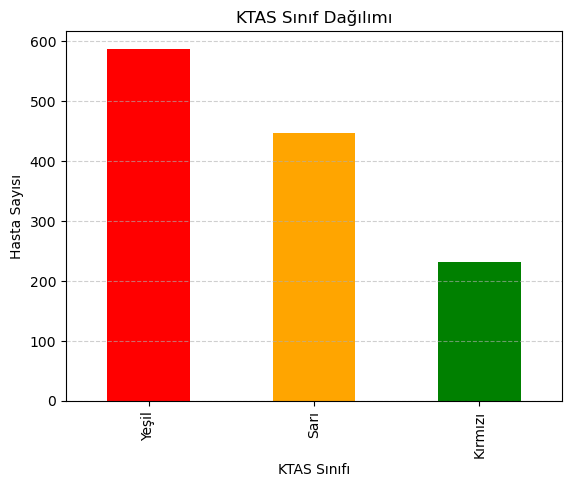

In [22]:
import matplotlib.pyplot as plt

df["ktas_class"].value_counts().plot(kind="bar", color=["red", "orange", "green"])
plt.title("KTAS Sınıf Dağılımı")
plt.xlabel("KTAS Sınıfı")
plt.ylabel("Hasta Sayısı")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [24]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include="object").columns.tolist()

print("Sayısal sütunlar:\n", numerical_cols)
print("\nKategorik (object) sütunlar:\n", categorical_cols)


Sayısal sütunlar:
 ['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode', 'Injury', 'Mental', 'Pain', 'KTAS_RN', 'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min', 'KTAS duration_min', 'mistriage']

Kategorik (object) sütunlar:
 ['Chief_complain', 'NRS_pain', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation', 'Diagnosis in ED', 'ktas_class']


In [26]:
for col in ["SBP", "DBP", "HR", "RR", "BT", "Saturation"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [28]:
df_encoded = pd.get_dummies(df, columns=["Sex", "Arrival mode", "Injury", "Mental", "Pain", "NRS_pain"])


In [30]:
def calculate_risk(row):
    risk = 0
    if row["BT"] >= 38: risk += 1
    if row["HR"] >= 100: risk += 1
    if row["Age"] >= 70: risk += 1
    return risk

df["risk_score"] = df.apply(calculate_risk, axis=1)


In [32]:
df[["Age", "BT", "HR", "risk_score"]].head()


,Age,BT,HR,risk_score
0,71,36.6,84.0,1
1,56,36.5,60.0,0
2,68,36.6,102.0,1
3,71,36.5,88.0,1
4,58,36.5,93.0,0
